# THIS CODE WILL NOT WORK BECAUSE WE HAVE NOT PROVIDED THE .SQL FILE (~305MB) IN THE GIT SUBMISSION

In [4]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
#from customplot import *
from sqlalchemy import create_engine

In [5]:
database = "database1.sqlite"

In [6]:
conn = sqlite3.connect(database)

In [7]:

df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

# Exploring Data


In [8]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


# Data Cleaning: Handling Missing Data


In [10]:
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [11]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

# Fixing Null Values by Deleting Them


In [12]:
# Fix it

# Take initial # of rows
rows = df.shape[0]

# Drop the NULL rows
df = df.dropna()

In [13]:
#Check if all NULLS are gone ?
print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

In [66]:
rows - df.shape[0]

3624

In [67]:
df = df.reindex(np.random.permutation(df.index))

In [68]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
111083,111084,172835,181984,2013-03-08 00:00:00,77.0,80.0,right,low,high,39.0,...,38.0,49.0,80.0,84.0,76.0,12.0,11.0,5.0,5.0,14.0
129006,129007,186362,119118,2008-08-30 00:00:00,63.0,65.0,right,medium,medium,31.0,...,46.0,62.0,25.0,25.0,25.0,7.0,6.0,12.0,7.0,12.0
45162,45163,213135,426202,2013-02-15 00:00:00,58.0,75.0,right,high,medium,48.0,...,46.0,54.0,29.0,23.0,17.0,14.0,12.0,15.0,10.0,14.0
79520,79521,205402,402975,2007-02-22 00:00:00,58.0,76.0,right,medium,medium,52.0,...,53.0,60.0,29.0,25.0,24.0,14.0,11.0,8.0,10.0,8.0
20970,20971,177635,41092,2013-02-15 00:00:00,78.0,82.0,left,high,medium,86.0,...,78.0,76.0,74.0,75.0,79.0,5.0,14.0,11.0,14.0,8.0


# Feature Correlation Analysis


In [15]:
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
0,48.0,67.0
1,48.0,67.0
2,48.0,62.0
3,47.0,61.0
4,47.0,61.0
5,59.0,74.0
6,59.0,74.0
7,59.0,73.0
8,59.0,73.0
9,59.0,73.0


In [16]:
df['overall_rating'].corr(df['penalties'])

0.39271510791118897

In [17]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

In [18]:
for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))


acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


# Data Visualization:


In [19]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [20]:
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [21]:
len(cols), len(correlations)

(34, 34)

In [75]:
def plot_dataframe(df, y_label):  
    color='blue'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotation=75); 
    

In [76]:
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

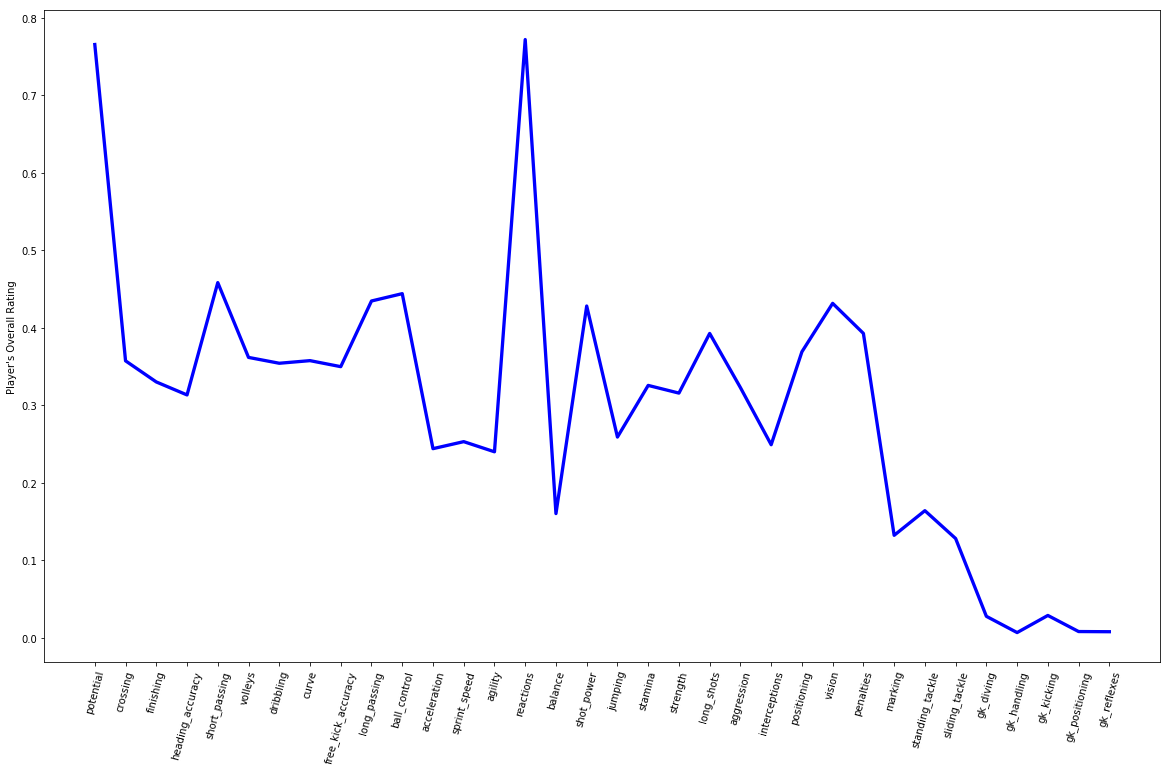

<Figure size 432x288 with 0 Axes>

In [77]:
plot_dataframe(df2, 'Player\'s Overall Rating')
plt.show()
plt.savefig("playerstats.jpeg")


# Analysis of Findings


In [37]:
select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [38]:
['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [39]:
df_select = df[select5features].copy(deep=True)

In [40]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
0,10.0,71.0,65.0,70.0,69.0
1,10.0,71.0,65.0,70.0,69.0
2,10.0,66.0,65.0,41.0,66.0
3,9.0,65.0,62.0,40.0,63.0
4,9.0,65.0,62.0,40.0,63.0


In [41]:
data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [42]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    50490
1    55903
2    23777
3    50184
dtype: int64

## Tables

In [43]:

tables = pd.read_sql("SELECT * FROM sqlite_master where type='table'" ,conn)

In [44]:
tables.shape

(8, 5)

In [45]:
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [46]:
countries = pd.read_sql("SELECT * FROM Country;", conn)

In [47]:
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [48]:
teams= pd.read_sql("SELECT * FROM Team;", conn)

In [49]:
teams.shape

(299, 5)

In [50]:
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [51]:
players = pd.read_sql("SELECT * FROM Player;", conn)

In [52]:
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [53]:
player_att = pd.read_sql("SELECT * FROM Player_Attributes;", conn)

In [54]:
player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [55]:
data = pd.read_csv("Europe/teams.csv")

In [56]:
data.head(10)

,Column1,Column2,Column3,Column4
0,aut,Austria,AUT,at
1,bel,Belgium,BEL,be
2,cyp,Cyprus,CYP,cy
3,ger,Germany,GER,de
4,est,Estonia,EST,ee
5,esp,Spain,ESP,es
6,fin,Finland,FIN,fi
7,fra,France,FRA,fr
8,gre,Greece,GRE,gr
9,irl,Ireland,IRL,ie


# Merging database

In [57]:
raw_data = {
        'id': ['1', '2', '3', '4', '5'],
        'team_long_name': ['Austria', 'Belgium', 'Cyprus', 'Germany', 'Estonia'], 
      'team_short_name': ['AUT', 'BEL', 'CYP', 'GER', 'EST']}
df_a = pd.DataFrame(raw_data, columns = ['id', 'team_long_name', 'team_short_name'])
df_a

,id,team_long_name,team_short_name
0,1,Austria,AUT
1,2,Belgium,BEL
2,3,Cyprus,CYP
3,4,Germany,GER
4,5,Estonia,EST


In [58]:
raw_data = {
        'id': ['4', '5', '6', '7', '8'],
        'team_long_name': ['KSV Cercle Brugge', 'RSC Anderlecht', 'KAA Gent', 'RAEC Mons', 'FCV Dender EH'], 
        'team_short_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['id', 'team_long_name', 'team_short_name'])
df_b

,id,team_long_name,team_short_name
0,4,KSV Cercle Brugge,Bonder
1,5,RSC Anderlecht,Black
2,6,KAA Gent,Balwner
3,7,RAEC Mons,Brice
4,8,FCV Dender EH,Btisan


In [59]:
raw_data = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9',],
        'team_fifa_api_id': [673.0, 675.0, 15005.0, 2007.0, 1750.0, 229.0, 674.0, 1747.0]}
df_n = pd.DataFrame(raw_data, columns = ['id','team_fifa_api_id'])
df_n

,id,team_fifa_api_id
0,1,673.0
1,2,675.0
2,3,15005.0
3,4,2007.0
4,5,1750.0
5,7,229.0
6,8,674.0
7,9,1747.0


In [61]:
df_new = pd.concat([df_a, df_b])
df_new

,id,team_long_name,team_short_name
0,1,Austria,AUT
1,2,Belgium,BEL
2,3,Cyprus,CYP
3,4,Germany,GER
4,5,Estonia,EST
0,4,KSV Cercle Brugge,Bonder
1,5,RSC Anderlecht,Black
2,6,KAA Gent,Balwner
3,7,RAEC Mons,Brice
4,8,FCV Dender EH,Btisan


In [62]:
pd.concat([df_a, df_b], axis=1)

,id,team_long_name,team_short_name,id,team_long_name,team_short_name
0,1,Austria,AUT,4,KSV Cercle Brugge,Bonder
1,2,Belgium,BEL,5,RSC Anderlecht,Black
2,3,Cyprus,CYP,6,KAA Gent,Balwner
3,4,Germany,GER,7,RAEC Mons,Brice
4,5,Estonia,EST,8,FCV Dender EH,Btisan


In [63]:
pd.merge(df_new, df_n, on='id')

,id,team_long_name,team_short_name,team_fifa_api_id
0,1,Austria,AUT,673.0
1,2,Belgium,BEL,675.0
2,3,Cyprus,CYP,15005.0
3,4,Germany,GER,2007.0
4,4,KSV Cercle Brugge,Bonder,2007.0
5,5,Estonia,EST,1750.0
6,5,RSC Anderlecht,Black,1750.0
7,7,RAEC Mons,Brice,229.0
8,8,FCV Dender EH,Btisan,674.0


# Create engine

In [64]:
connection_string = "database1.sqlite"
#ngine = create_engine(f'sqlite://{connection_string}')
e = create_engine('sqlite://') 

In [65]:
e.table_names()

[]